# Notebook comentada y documentada. Ejercicios 1, 2 y 8 al final

In [133]:
from sympy import *
from sympy.polys import polytools

In [2]:
#Se define la variable
x=symbols('x')

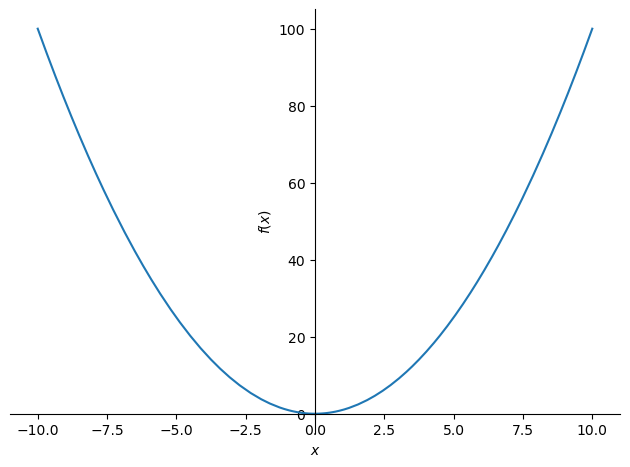

In [4]:
#Graficar x^2
c1=plotting.plot(x*x)

In [7]:
#Graficar x^2 y x^3 sin mostrarlas
cl=plotting.plot(x*x,show=False)
c2=plotting.plot(x**3,show=False)

In [ ]:
c1 #Indica qué es y en qué espacio de memoria está

In [ ]:
c1.append(c2[0]) #Anida las gráficas sin los ejes

In [12]:
c1.extend(c2) #Agregar c2 a c1

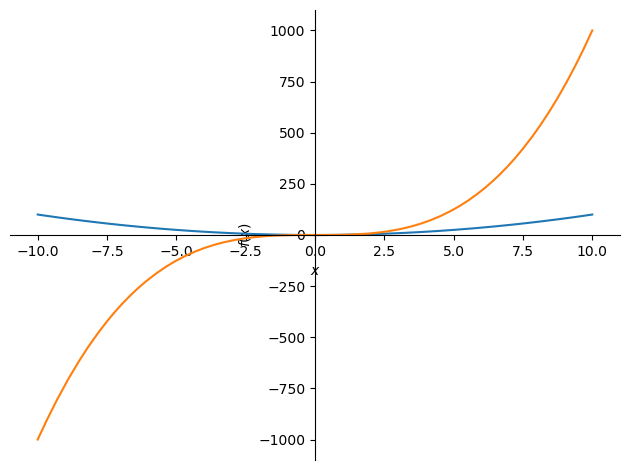

In [11]:
c1.show()

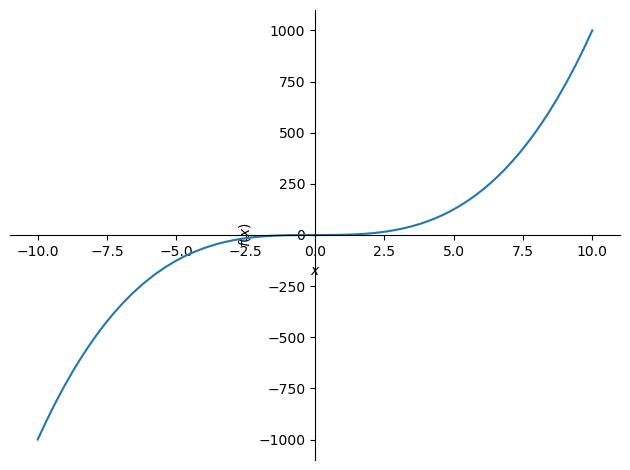

In [14]:
#Mostrar c2 solita
c2.show()

In [15]:
#Para abreviar los comandos
from sympy.plotting import plot

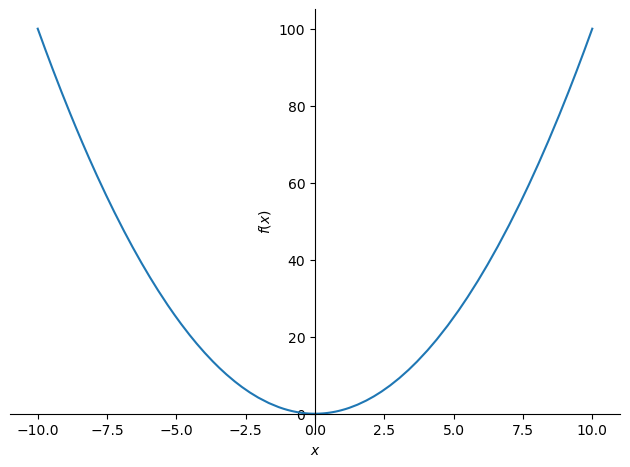

In [16]:
#Graficar x^2
plot(x**2)

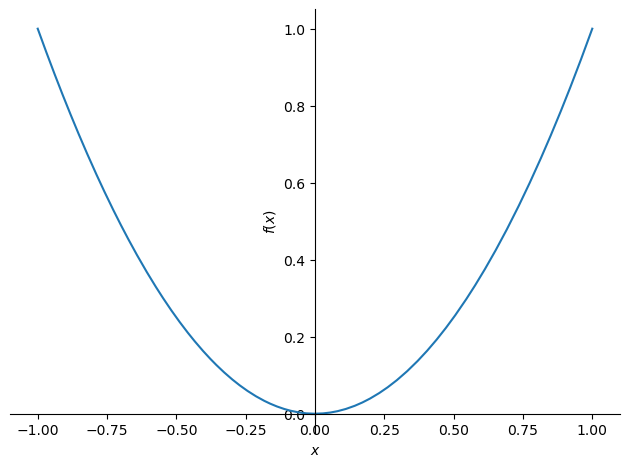

In [17]:
#Graficar x^2, con x en [-1,1]
plot(x**2,(x,-1,1))

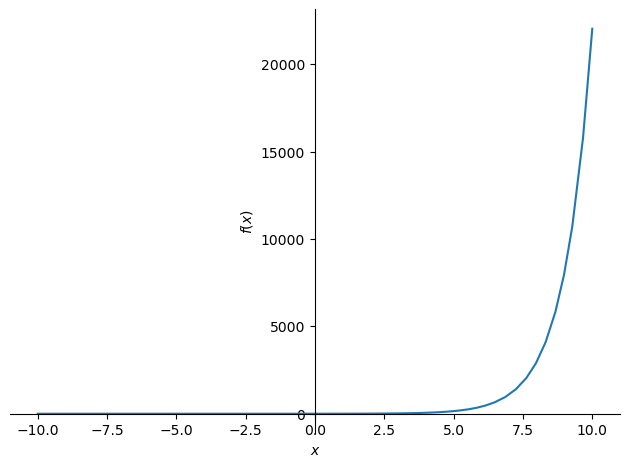

In [18]:
plot(exp(x))
#plot(exp(x),(x,0,2))

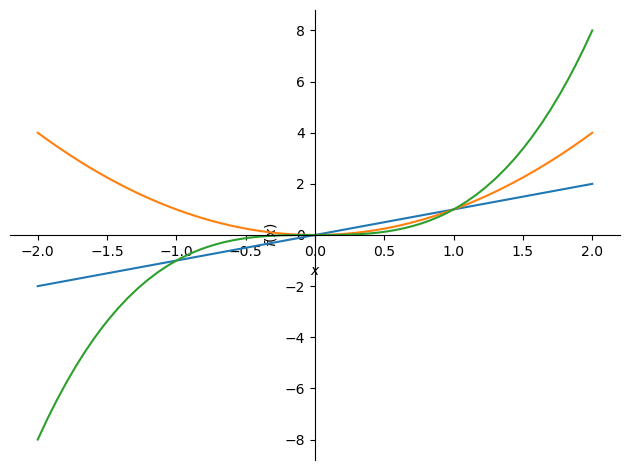

In [21]:
#Graficar x, x^2 y x^3 juntas, con x en [-2,2]
plot(x,x**2,x**3, (x,-2,2))

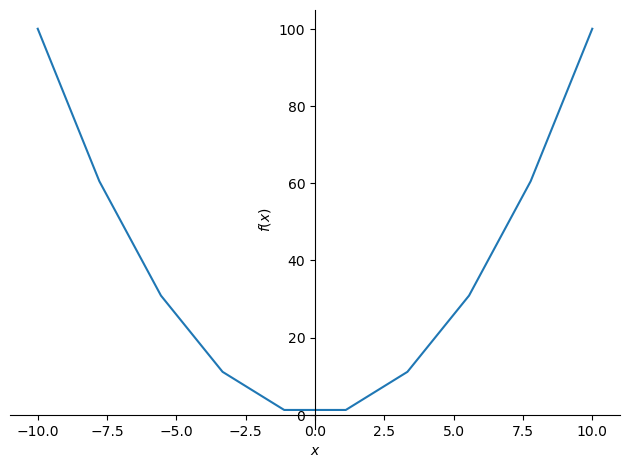

In [26]:
#Graficar x^2. número de puntos para qué tan "suave" se quiere la gráfica
plot(x**2,adaptive=False,nb_of_points=10)

### Curvas parametrizadas

In [28]:
from sympy import plot_parametric

In [29]:
s=symbols('s')

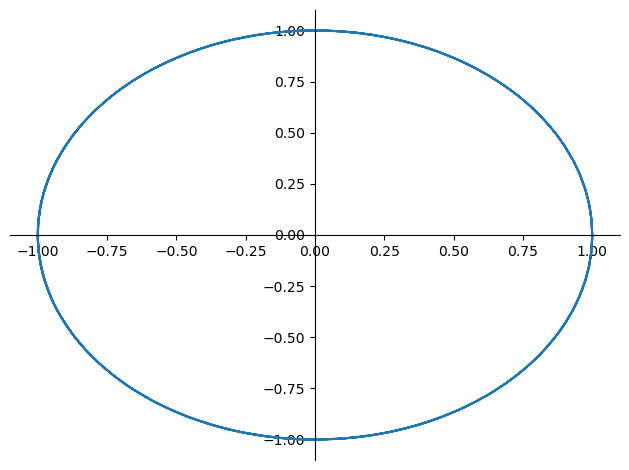

In [31]:
#x=cos(s); y=sen(s)
plot_parametric((cos(s)),sin(s))

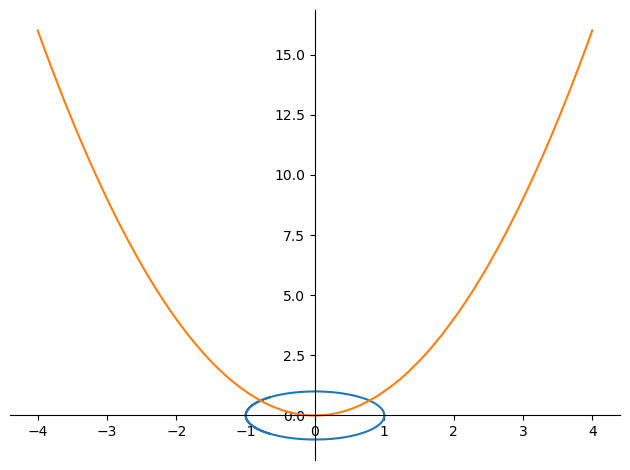

In [32]:
#x=cos(s); y=sen(s); x=s; y=x^2, con s de -4 a 4
plot_parametric((cos(s),sin(s)),(s,s**2),(s,-4,4))

In [35]:
#Cambiar el color de c2
c2[0].line_color='green'

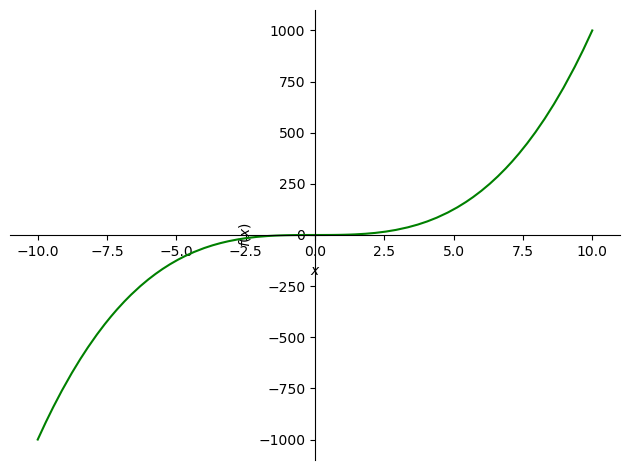

In [34]:
c2.show()

### Graficas 3D

In [36]:
from sympy.plotting import plot3d

In [37]:
x,y=symbols('x y')

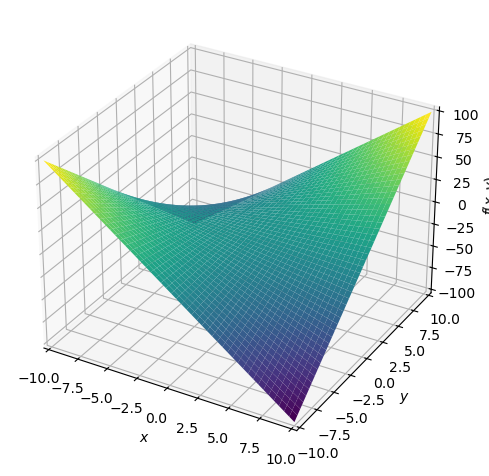

In [38]:
plot3d(x*y)

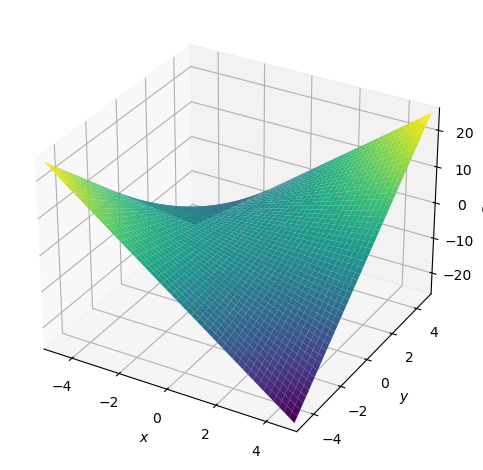

In [39]:
#Graficar xy con x en [-5,5] y y en [-5,5]
plot3d(x*y, (x,-5,5),(y,-5,5))

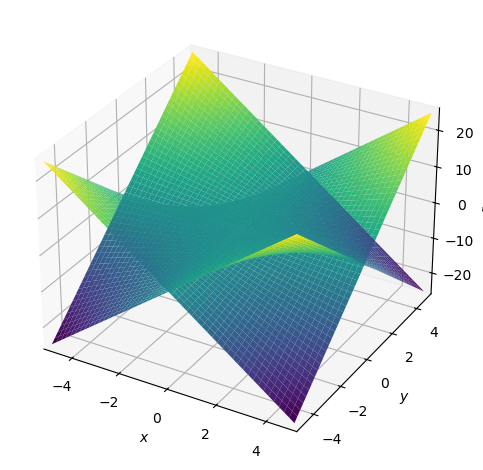

In [40]:
plot3d(x*y, -x*y, (x,-5,5),(y,-5,5))

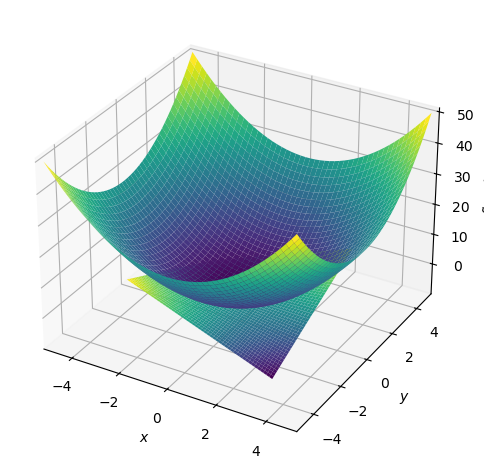

In [42]:
#Graficar x^2+y^2 en el plano (-5,-5) a (5,5) y graficar xy en el plano de (-3,-3) a (3,3)
plot3d((x**2 + y**2, (x,-5,5),(y,-5,5)),(x*y,(x,-3,3),(y,-3,3)))

In [43]:
from sympy.plotting import plot3d_parametric_line

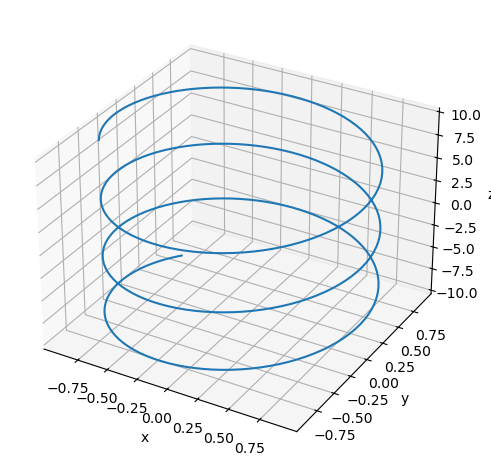

In [45]:
#Paramétrica (hélice)
plot3d_parametric_line(cos(s),sin(s),s)

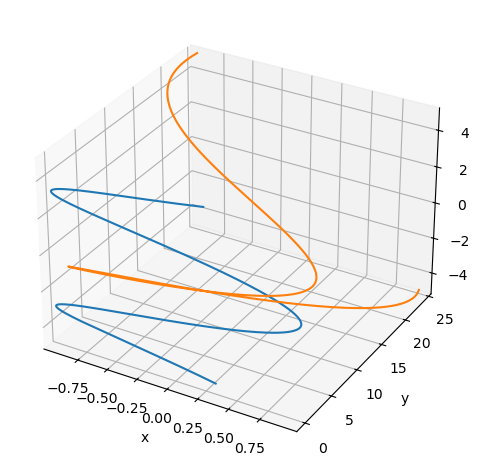

In [46]:
plot3d_parametric_line((cos(s),sin(s),s,(s,-5,5)),(sin(s),s**2,s,(s,-5,5)))

In [47]:
from sympy.plotting import plot3d_parametric_surface

In [48]:
u, v =symbols('u v')

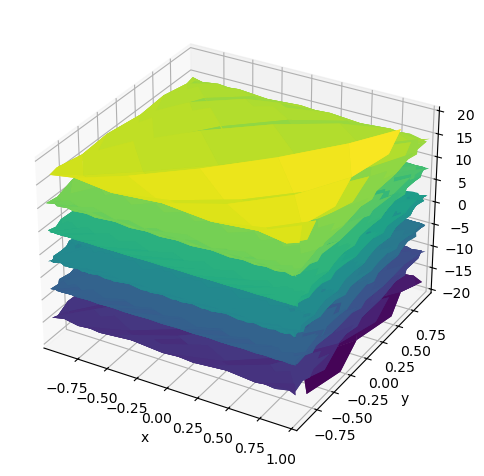

In [51]:
#Superficie paramétrica (CUrvas de nivel)
plot3d_parametric_surface(cos(u+v),sin(u-v),u-v)

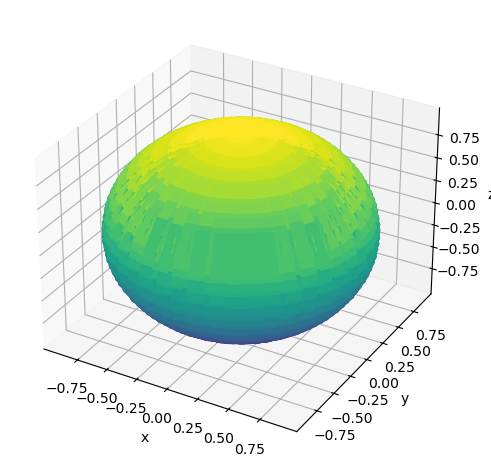

In [53]:
#Esferita
plot3d_parametric_surface(cos(v)*cos(u),cos(v)*sin(u),sin(v))

### Funciones implícitas

In [55]:
from sympy import plot_implicit, symbols, Eq, And

In [56]:
x, y = symbols(' x y')

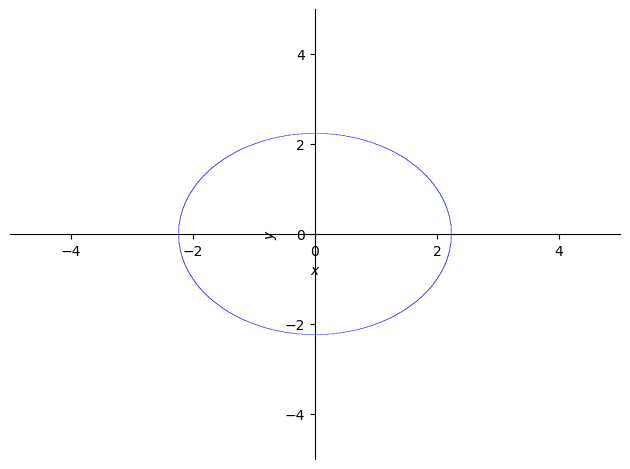

In [60]:
#Gráfica implicita,  x^2 +y^2 = 5
p1 = plot_implicit(Eq(x**2 + y**2, 5)) 

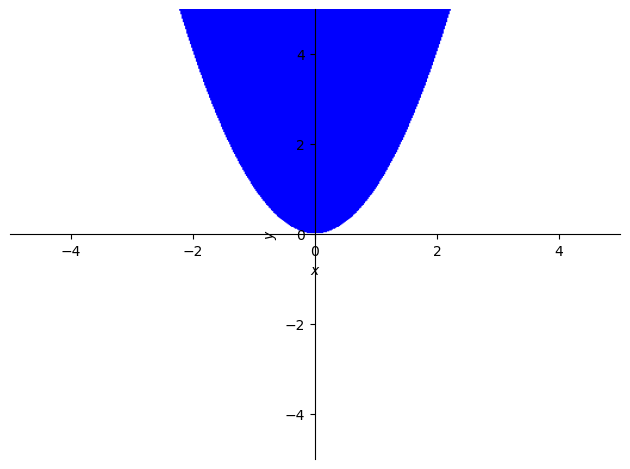

In [61]:
p6 = plot_implicit(y > x**2) 

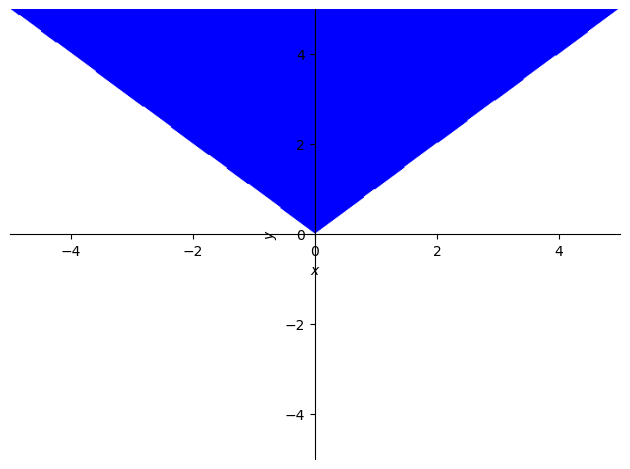

In [63]:
#Región donde y>x y y>-x
p6 = plot_implicit(And(y > x, y > -x)) 

---
# Solución de problemas de la actividad 1

## Problema 1

Una partícula se mueve a lo largo del eje \$x\$ de modo que su velocidad instantánea está
dada como una función del tiempo \$t\$ por \$v = 12 − 3t^2\$. Al tiempo \$t = 1\$ está localizada en \$x=-5\$

a) Establezca un problema de valor inicial que describa el movimiento.

Establecemos la ecuación diferencial \$ \frac{dx}{dt} = 12-3t^2 \$ con \$ x(1) = -5 \$

b) Resuelva el problema en (a).

In [82]:
t = symbols('t')
x = Function('x')
x1 = -5

In [79]:
ode = Eq( Derivative(x(t), t), 12 -3*t*t )
ode

Eq(Derivative(x(t), t), 12 - 3*t**2)

In [85]:
#Se resuelve la ecuación con la condición inicial
sol = dsolve( ode, x(t), ics={x(1):x1} )
sol

Eq(x(t), -t**3 + 12*t - 16)

c) Determine dónde estará la partícula en los tiempos t = 2 y t = 3.

In [89]:
sol.evalf( subs={t:2} )

Eq(x(2), 0)

In [90]:
sol.evalf( subs={t:3} )

Eq(x(3), -7.0)

d) Determine los tiempos cuando la partícula está en el origen. Al hacer esto, ¿qué 
supuestos se están haciendo?

In [150]:
#RootOf devuelve la i-ésima raíz de la expresión
[RootOf( sol.rhs, i) for i in range(3)]

[-4, 2, 2]

Por lo tanto, las raíces son: \$4\$ y \$2\$ como raíz doble

e) Describa el movimiento de la partícula usando un gráfico u otro medio.

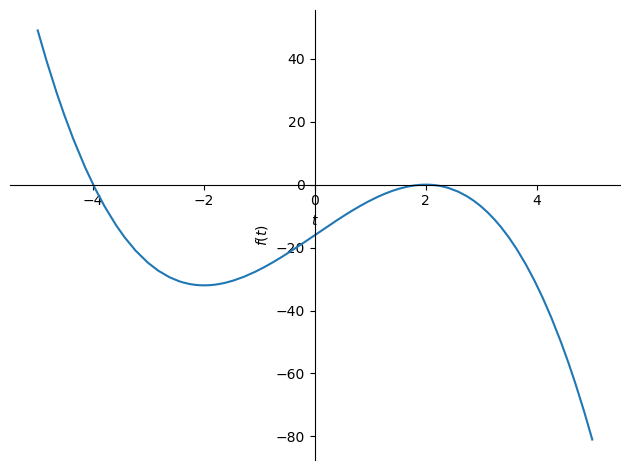

In [106]:
c1 = plot(-1*(t**3) +12*t -16, (t,-5,5))

## Problema 2

Una partícula se mueve a lo largo del eje \$x\$ de modo tal que su aceleración instantánea está dada como una función del tiempo \$t\$ por \$a = 10 − 12t^2\$. En los tiempos \$t = 2\$ y \$t = 3\$ la partícula está localizada en \$x = 0\$ y \$x = 40\$, respectivamente.

(a) Establezca la ecuación diferencial y condiciones asociadas que describen el mo
vimiento. ¿El problema es de valor inicial o de frontera?

Establecemos la ecuación \$ \frac{d^2x}{dt^2} = 10 -12t^2 \$; con las condiciones de frontera (pues las dan en diferentes valores de  \$t\$): \$x(2)=0\$ y \$x(3) = 40\$?

(b) Solucione el problema en (a).

In [152]:
t = symbols('t')
x = Function('x')
x2 = 0
x3 = 40

In [153]:
ode = Eq( Derivative(x(t), t, t), 10 -12*t**2 )
ode

Eq(Derivative(x(t), (t, 2)), 10 - 12*t**2)

In [155]:
#Se resuelve la ecuación con las condiciones de frontera
sol = dsolve( ode, x(t), ics={x(2):x2, x(3):x3} )
sol

Eq(x(t), -t**4 + 5*t**2 + 80*t - 164)

c) Determine la posición de la partícula en \$t = 1\$.

In [157]:
sol.evalf( subs={t:1} )

Eq(x(1), -80.0)

Dibuje aproximadamente el gráfico de \$x\$ contra \$t\$ y úselo para describir el movimiento de la partícula.

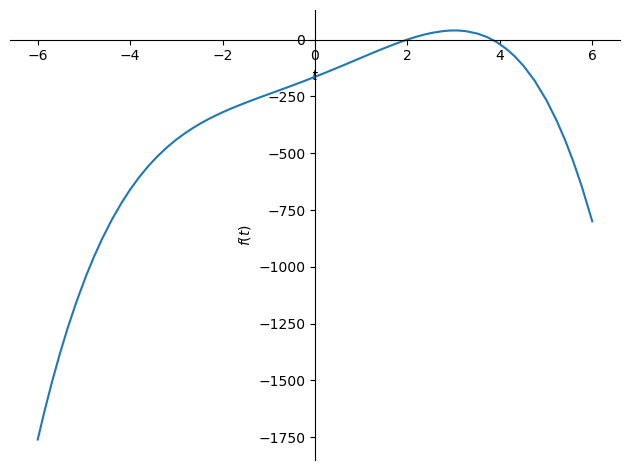

In [159]:
c2 = plot( -t**4 +5*t**2 +80*t -164, (t, -6, 6) )

## Problema 8

#### Se definen variables

In [73]:
a = 1
b = 1
theta = symbols("θ")

#### Se grafica la ecuación paramétrica

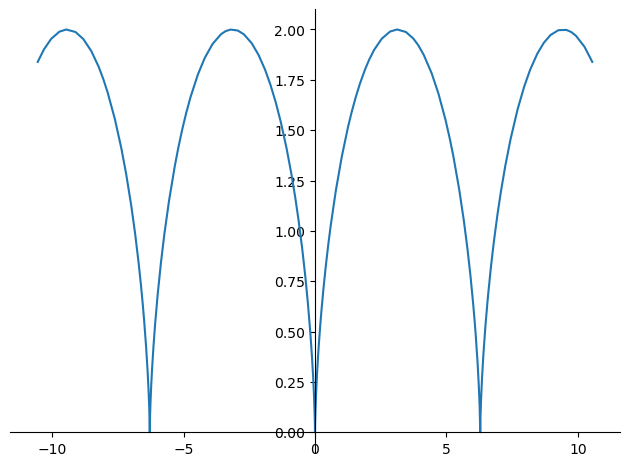

In [74]:
plot_parametric( a*(theta-sin(theta)), a*(1-cos(theta)) )